In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

In [13]:
def get_ae_rec_error_dict_from_csv(csv_path):
    rec_error_dict = {}

    with open(csv_path, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        row1 = next(csvreader)
        
        curr_id = row1[0]
        curr_rec_errors = [[float(row1[1]),float(row1[2])]]
        
        for row in csvreader:
            if(row[0] != curr_id):
                rec_error_dict[curr_id] = np.array(curr_rec_errors).astype(float)
                curr_rec_errors = [[float(row[1]),float(row[2])]]
                curr_id = row[0]
            else:
                curr_rec_errors.append([float(row[1]),float(row[2])])
                
        rec_error_dict[curr_id] = np.array(curr_rec_errors).astype(float)
                
    return rec_error_dict 

rec_error_repo_path = '/Volumes/My Passport for Mac/i24_random_sample/losses_seq_len_100'

rec_error_files = os.listdir(rec_error_repo_path)

csv_path = os.path.join(rec_error_repo_path,rec_error_files[0])

begin_load_time = time.time()

rec_error_dict =  get_ae_rec_error_dict_from_csv(csv_path)

end_load_time = time.time()

print('Loading time: '+str(end_load_time-begin_load_time))

Loading time: 3.2549428939819336


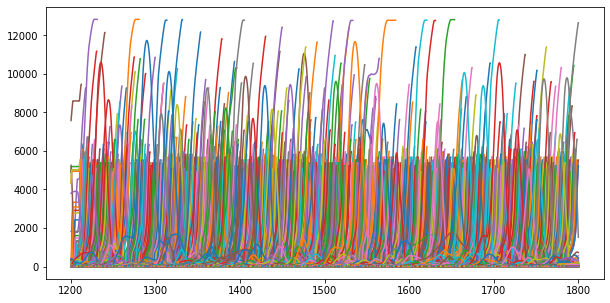

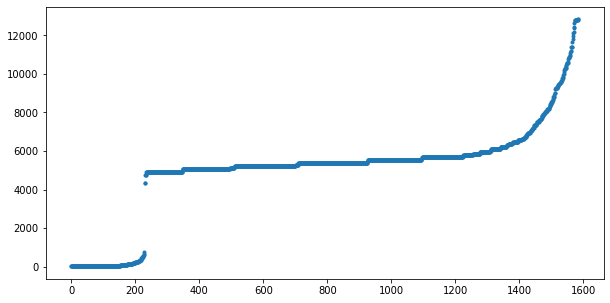

In [19]:
plt.figure(figsize=[10,5])
for veh_id in rec_error_dict:
    times = rec_error_dict[veh_id][:,0]
    rec_error = rec_error_dict[veh_id][:,1]
    plt.plot(time,rec_error)
    
plt.figure(figsize=[10,5])
max_rec_errors = []
for veh_id in rec_error_dict:
    times = rec_error_dict[veh_id][:,0]
    rec_error = rec_error_dict[veh_id][:,1]
    max_rec_errors.append(np.max(rec_error))
plt.plot(np.sort(max_rec_errors),'.')

In [21]:
import time

csv_path = os.path.join(rec_error_repo_path,'Dur_19.15043308018294_Mag_-1.755389161086853_Inflow_1800_ACCPenetration_0.2_AttackPenetration_0.1_ver_1.csv')

begin_load_time = time.time()

rec_error_dict =  get_ae_rec_error_dict_from_csv(csv_path)

end_load_time = time.time()

print('Loading time: '+str(end_load_time-begin_load_time))

Loading time: 4.990942001342773


(0, 15000)

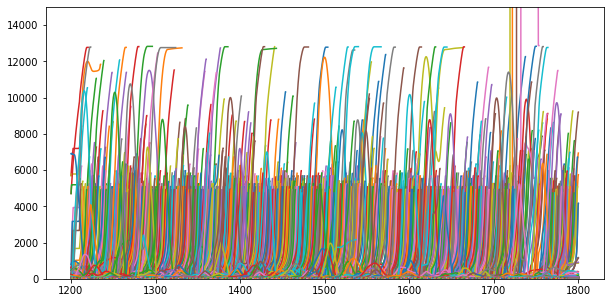

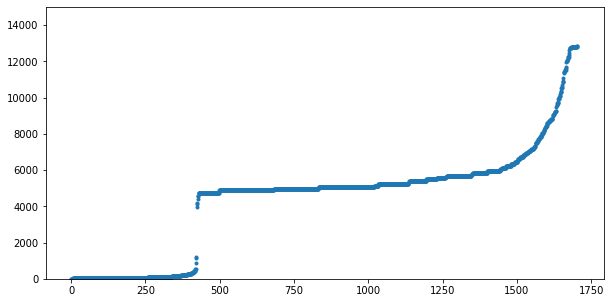

In [37]:
import matplotlib
%matplotlib inline 

plt.figure(figsize=[10,5])
for veh_id in rec_error_dict:
    times = rec_error_dict[veh_id][:,0]
    rec_error = rec_error_dict[veh_id][:,1]
    plt.plot(times,rec_error)
plt.ylim([0,15000])
    
plt.figure(figsize=[10,5])
max_rec_errors = []
for veh_id in rec_error_dict:
    times = rec_error_dict[veh_id][:,0]
    rec_error = rec_error_dict[veh_id][:,1]
    max_rec_errors.append(np.max(rec_error))
plt.plot(np.sort(max_rec_errors),'.')
plt.ylim([0,15000])

In [33]:
%matplotlib qt
import SumoNetVis
# net = SumoNetVis.Net('/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/examples/exp_configs/templates/sumo/i24_subnetwork_fix_merges.net.xml')

import flow.visualize.visualize_ring
from importlib import reload
reload(flow.visualize.visualize_ring)
from flow.visualize.visualize_ring import get_sim_timeseries_all_data

i24_sim_repo_path = '/Volumes/My Passport for Mac/i24_random_sample/part_2'

sim_csv_path = 'Dur_19.15043308018294_Mag_-1.755389161086853_Inflow_1800_ACCPenetration_0.2_AttackPenetration_0.1_ver_1.csv'

sim_csv_path = os.path.join(i24_sim_repo_path,sim_csv_path)

all_timeseries_data = get_sim_timeseries_all_data(sim_csv_path)

Data loaded.


In [36]:
with open(sim_csv_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    row1 = next(csvreader)
    print(row1)

['time', 'id', 'type', 'x', 'y', 'speed', 'headway', 'leader_id', 'follower_id', 'leader_rel_speed', 'target_accel_with_noise_with_failsafe', 'target_accel_no_noise_no_failsafe', 'target_accel_with_noise_no_failsafe', 'target_accel_no_noise_with_failsafe', 'realized_accel', 'road_grade', 'edge_id', 'lane_number', 'distance', 'relative_position']


In [34]:
veh_ids = list(rec_error_dict.keys())
print(all_timeseries_data[veh_id][0])

['1789.8', 'flow_90.643', 'human_main', '5808.608731086909', '21358.31785051218', '25.5', '36.029941153777266', 'flow_90.642', '', '-2.252600520069951', '0', '0', '0', '0', '0', '0', 'Eastbound_3', '2', '0.0', '5.1']


In [35]:
net = SumoNetVis.Net('/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/examples/exp_configs/templates/sumo/i24_subnetwork_fix_merges.net.xml')
net.plot()

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/SumoNetVis/Net.py:528: UserWarning: Can't generate stopline geometry for lane 683657785#1_0
  warnings.warn("Can't generate stopline geometry for lane " + self.id)


In [57]:
max_rec_error_vals = []
max_rec_error_locations = []
max_rec_error_speeds = []
max_rec_error_speed_differences = []
max_rec_error_spacings = []
max_rec_veh_ids = []

for veh_id in veh_ids:
    all_veh_data = all_timeseries_data[veh_id]
    rec_errors = rec_error_dict[veh_id][:,1]
    
    max_rec_veh_ids.append(veh_id)
    
    max_rec_error = rec_errors[0]
    temp = 0
    for i in range(1,len(rec_errors)):
        if(rec_errors[i] > max_rec_error):
            temp = i
            max_rec_error = rec_errors[i]
    max_rec_error_vals.append(max_rec_error)
    x = float(all_veh_data[temp][3])
    y = float(all_veh_data[temp][4])
    v = float(all_veh_data[temp][5])
    s = float(all_veh_data[temp][6])
    dv = float(all_veh_data[temp][9])
    max_rec_error_locations.append([x,y])
    max_rec_error_speeds.append(v)
    max_rec_error_speed_differences.append(dv)
    max_rec_error_spacings.append(s)
    
print('Finished.')

Finished.


(0, 14000)

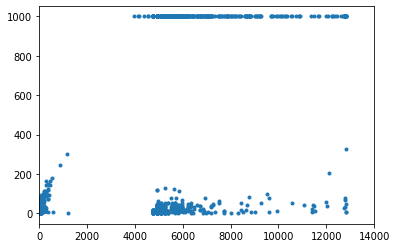

In [56]:
%matplotlib inline
plt.plot(max_rec_error_vals,max_rec_error_spacings,'.')
plt.xlim([0,14000])

(5500, 8200)

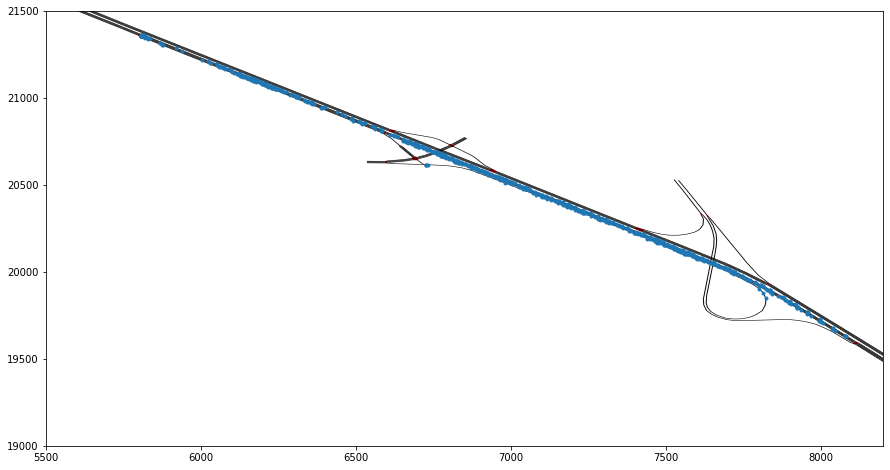

In [68]:
%matplotlib inline
non_empty_leader_max_rec_error_indices = []
for i in range(len(max_rec_error_vals)):
    if(max_rec_error_spacings[i] < 500):
        non_empty_leader_max_rec_error_indices.append(i)

max_rec_error_locations = np.array(max_rec_error_locations)
x_vals = max_rec_error_locations[non_empty_leader_max_rec_error_indices,0]
y_vals = max_rec_error_locations[non_empty_leader_max_rec_error_indices,1]
        
        
plt.figure(figsize=[15,8])
        
net.plot()

plt.plot(x_vals,y_vals,'.')

#Zoomed in to end of the network:
# plt.ylim([19500,20200])
# plt.xlim([7500,8200])



#For full network
plt.ylim([19000,21500])
plt.xlim([5500,8200])

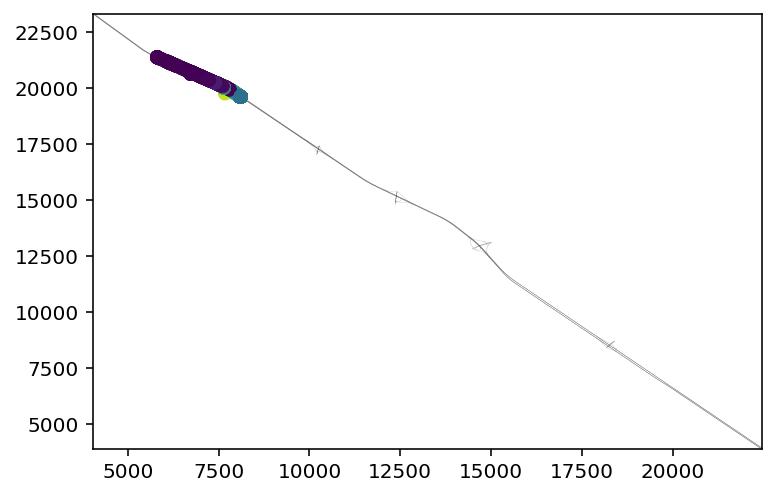

In [61]:
%matplotlib qt
net.plot()
max_rec_error_locations = np.array(max_rec_error_locations)
x_vals = max_rec_error_locations[:,0]
y_vals = max_rec_error_locations[:,1]

min_x = np.min(x_vals)
max_x = np.max(x_vals)
min_y = np.min(y_vals)
max_y = np.max(y_vals)

plt.scatter(x_vals,y_vals,c=max_rec_error_vals)
plt.clim([0,14000])
# plt.ylim([min_y,max_y])
# plt.xlim([min_x,max_x])